# Import common packages

In [9]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm
import arviz as az
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')
az.style.use('arviz-darkgrid')

# Given a distribution, generate data

In [10]:
data = stats.norm(22, 3).rvs(100)
data

array([20.62787731, 23.98018902, 20.81940954, 21.57048958, 22.31224716,
       13.93170627, 22.37850631, 23.47460152, 21.94149864, 23.50640313,
       22.04861628, 19.86547631, 20.94902959, 27.33772032, 27.34060006,
       26.59748824, 23.5304632 , 22.22735419, 21.24364777, 18.6452185 ,
       16.11471476, 19.14301981, 19.75339067, 23.60828402, 23.69711034,
       25.15714972, 20.95997311, 21.40434235, 27.82367121, 13.73739029,
       17.82091709, 23.08452114, 19.75098403, 20.88382391, 22.54967166,
       19.32727631, 25.05676183, 25.783656  , 24.50553881, 24.20439876,
       19.7242834 , 20.07790616, 18.64336952, 24.09984385, 19.03317131,
       29.73692633, 19.08253791, 24.28313757, 18.13908685, 17.95625752,
       24.55986893, 19.27040028, 21.55830393, 25.84235992, 23.00266299,
       22.05592289, 18.38680714, 24.26991975, 19.36448828, 21.37788991,
       20.19025925, 20.47321503, 21.06452905, 19.18397529, 25.81440808,
       21.12521955, 16.60397029, 20.11974547, 23.60598329, 21.30

# Given data, find the distribution (baysian analysis)

In [11]:
with pm.Model() as model:
    μ = pm.Normal('μ', mu=0, sd=50)
    ϵ = pm.HalfNormal('ϵ', 10)
    y = pm.Normal('y', mu=μ, sd=ϵ, observed=data)
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [ϵ, μ]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:01<00:00, 4060.12draws/s]


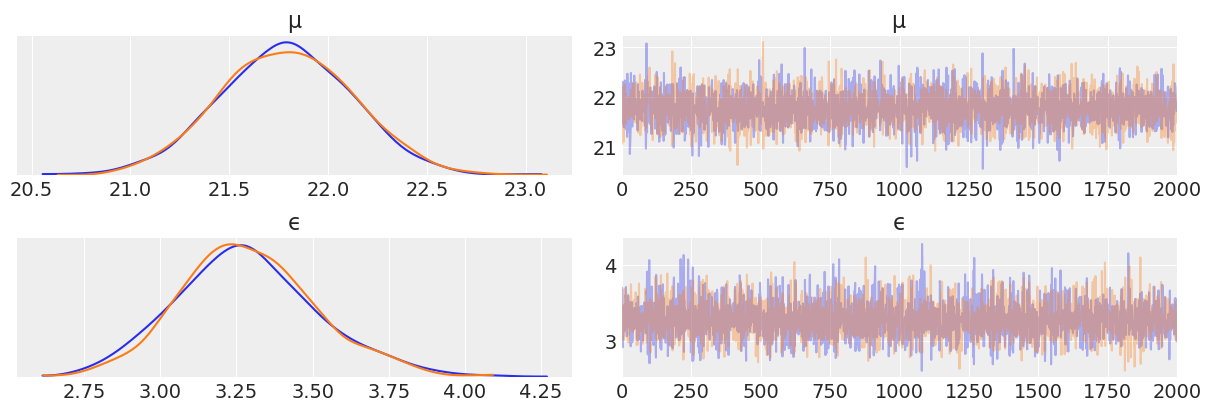

In [12]:
az.plot_trace(trace, var_names=['μ', 'ϵ']);

# Given data, find the distribution (search - loss function)

In [31]:
# ϵ is held constant
losses = []
for μ in range(0, 40):
    loss = np.log(stats.norm(μ, 3).pdf(data)).sum() * -1
    losses.append(loss)

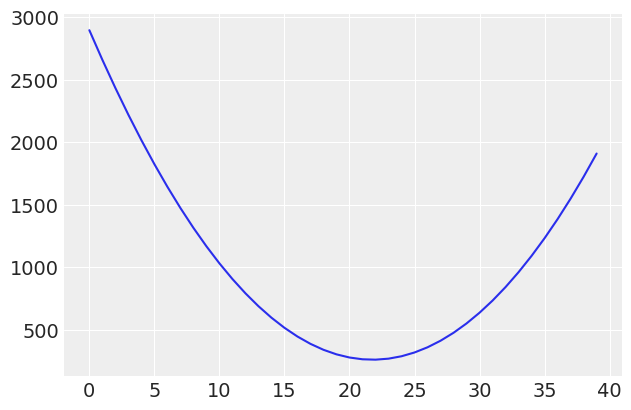

In [32]:
plt.plot(range(0, 40), losses);